# Multiple Regression

In [1]:
# The standard imports
%pylab inline
import pandas as pd
# For the 3d plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# For the statistic
from statsmodels.formula.api import ols

Populating the interactive namespace from numpy and matplotlib


# Generate and Show the Data

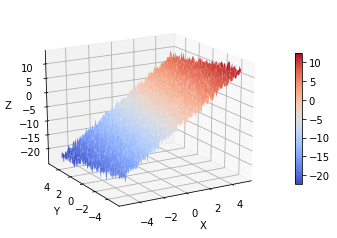

In [3]:
x = np.linspace(-5,5,101)
(X,Y) = np.meshgrid(x,x)
Z = -5 + 3*X-0.5*Y+np.random.randn(np.shape(X)[0], np.shape(X)[1])

# Plot the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)
ax.view_init(20,-120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, shrink=0.6)

# Simple Plane Fit

In [4]:
M = np.vstack((np.ones(len(X)), X, Y)).T
bestfit = np.linalg.lstsq(M,Z)[0]
print('Best fit plane:', bestfit)

Best fit plane: [[  8.84919832e+12   1.16395211e+12   4.57498440e+12 ...,   5.51842491e+11
    3.91241943e+12  -7.10845163e+11]
 [  1.11837676e+12  -1.08031001e+13  -6.25366360e+11 ...,  -9.04006959e+12
   -4.85394378e+12   1.18246282e+13]
 [ -7.68189709e+12  -7.62081419e+12  -9.45102132e+12 ...,   7.55034779e+12
   -7.11016611e+12  -2.75159179e+11]
 ..., 
 [  2.89919428e+12   8.77800678e+11   5.30268111e+12 ...,   7.77248768e+12
   -2.42704464e+12   1.75750227e+10]
 [ -1.95161380e+12   8.93893813e+11  -3.94342005e+12 ...,  -1.35123043e+12
   -1.91488607e+12  -1.55905736e+12]
 [  2.76981019e+12  -1.10295353e+12   4.78838351e+12 ...,   1.37916029e+12
    7.30151853e+11   7.20914800e+11]]


# Multilinear Regression Model

In [5]:
# calculate fit, P-values, confidence intervals etc.
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
# Convert the data into a Pandas DataFrame
df = pd.DataFrame({'x':X, 'y':Y, 'z':Z})

# Fit the model
model = ols("z ~ x + y", df).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 4.036e+05
Date:                Sat, 19 May 2018   Prob (F-statistic):               0.00
Time:                        21:18:19   Log-Likelihood:                -14442.
No. Observations:               10201   AIC:                         2.889e+04
Df Residuals:                   10198   BIC:                         2.891e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0044      0.010   -506.988      0.0